# Introduction

Time series forecasting is a technique used to predict future values based on historical data. In this notebook, I explore the application of the ARIMA (AutoRegressive Integrated Moving Average) model, a widely used method for time series analysis and forecasting.

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from statsmodels.tsa.arima.model import ARIMA
from datetime import date, timedelta

In [ ]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [ ]:
# try to get amazon data
data = yf.download('AMZN',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
245 2024-06-03  177.699997  178.699997  175.919998  178.339996  178.339996   
246 2024-06-04  177.639999  179.820007  176.440002  179.339996  179.339996   
247 2024-06-05  180.100006  181.500000  178.750000  181.279999  181.279999   
248 2024-06-06  181.750000  185.000000  181.490005  185.000000  185.000000   
249 2024-06-07  184.899994  186.289993  183.360001  184.300003  184.300003   

       Volume  
245  30786600  
246  27198400  
247  32116400  
248  31371200  
249  27977300  


In [ ]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-06-12  126.570000
1 2023-06-13  126.660004
2 2023-06-14  126.419998
3 2023-06-15  127.110001
4 2023-06-16  125.489998


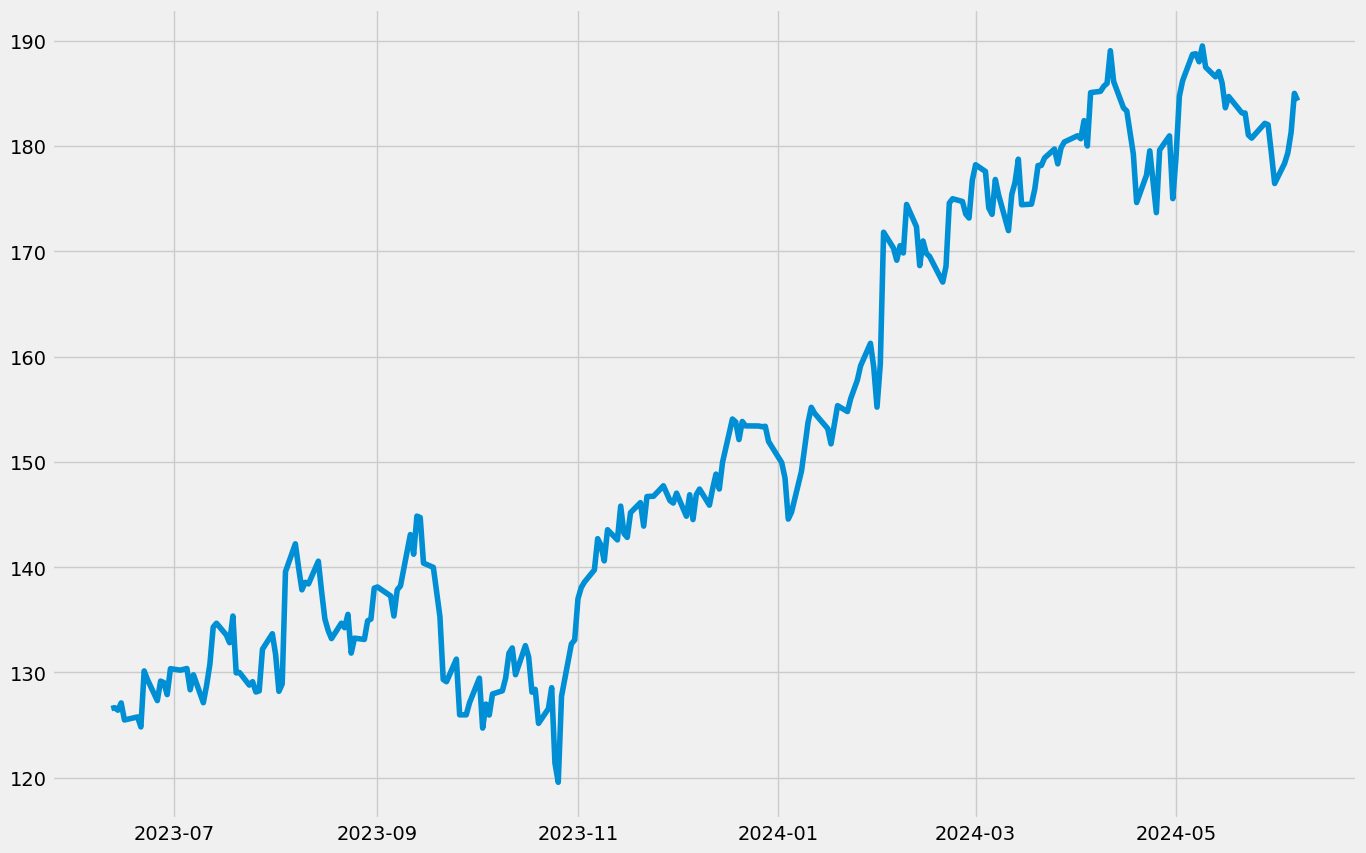

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

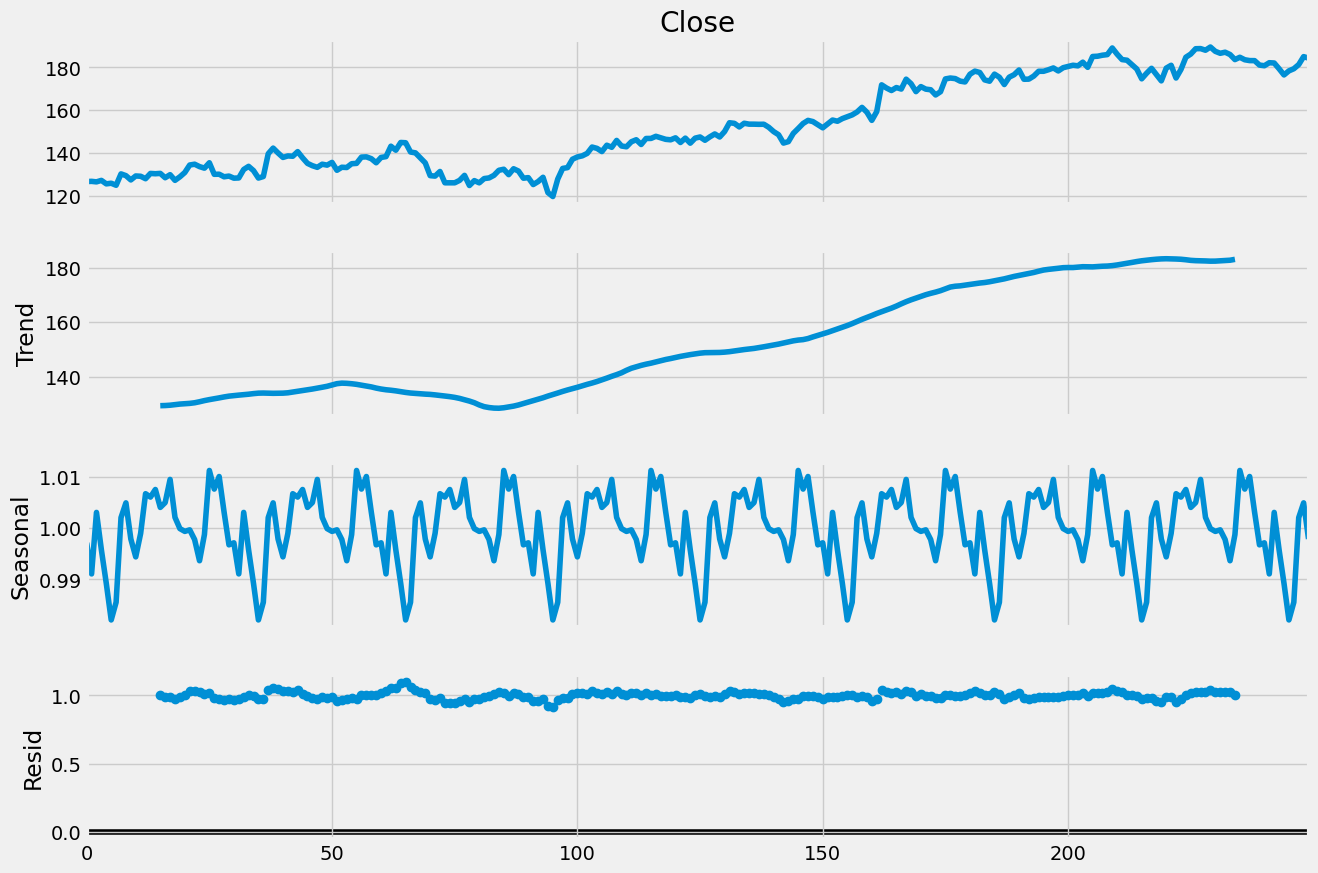

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

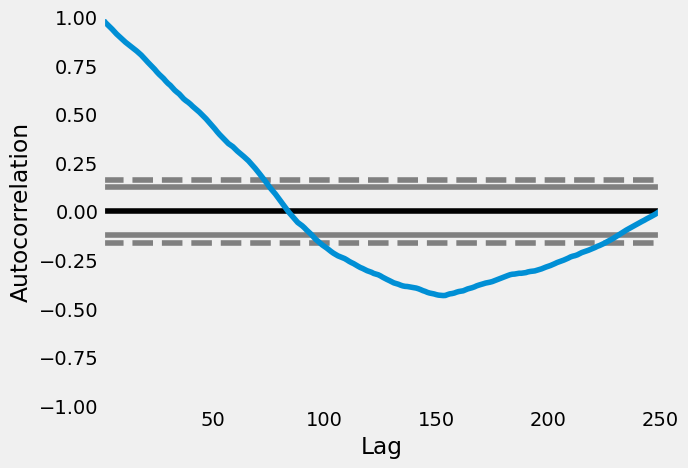

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

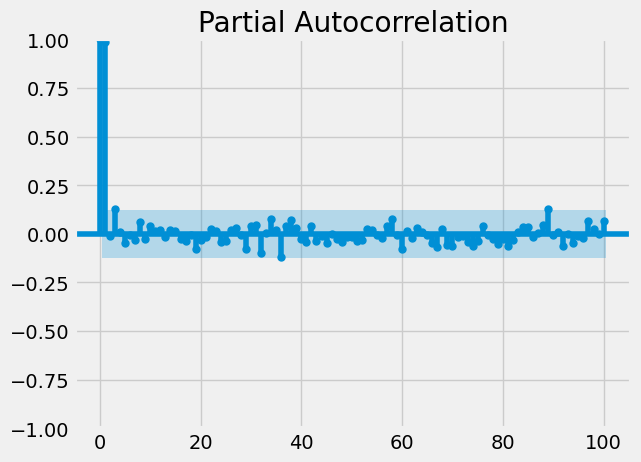

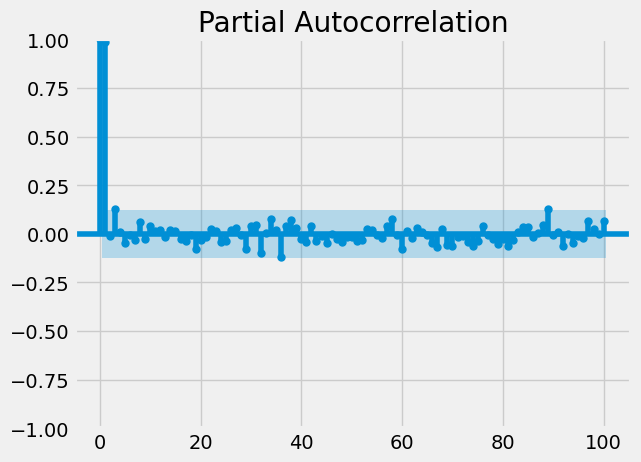

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
p, d, q = 5, 1, 2
# Fit the ARIMA model
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()

print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -578.795
Date:                Sun, 09 Jun 2024   AIC                           1173.590
Time:                        16:41:08   BIC                           1201.730
Sample:                             0   HQIC                          1184.917
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6113      0.223      7.237      0.000       1.175       2.048
ar.L2         -0.9028      0.241     -3.746      0.000      -1.375      -0.430
ar.L3          0.3210      0.151      2.131      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      126.569998
2      126.659627
3      126.402201
4      127.160203
          ...    
245    177.579086
246    179.298479
247    179.039891
248    180.983017
249    184.774263
Name: predicted_mean, Length: 250, dtype: float64


<Axes: >

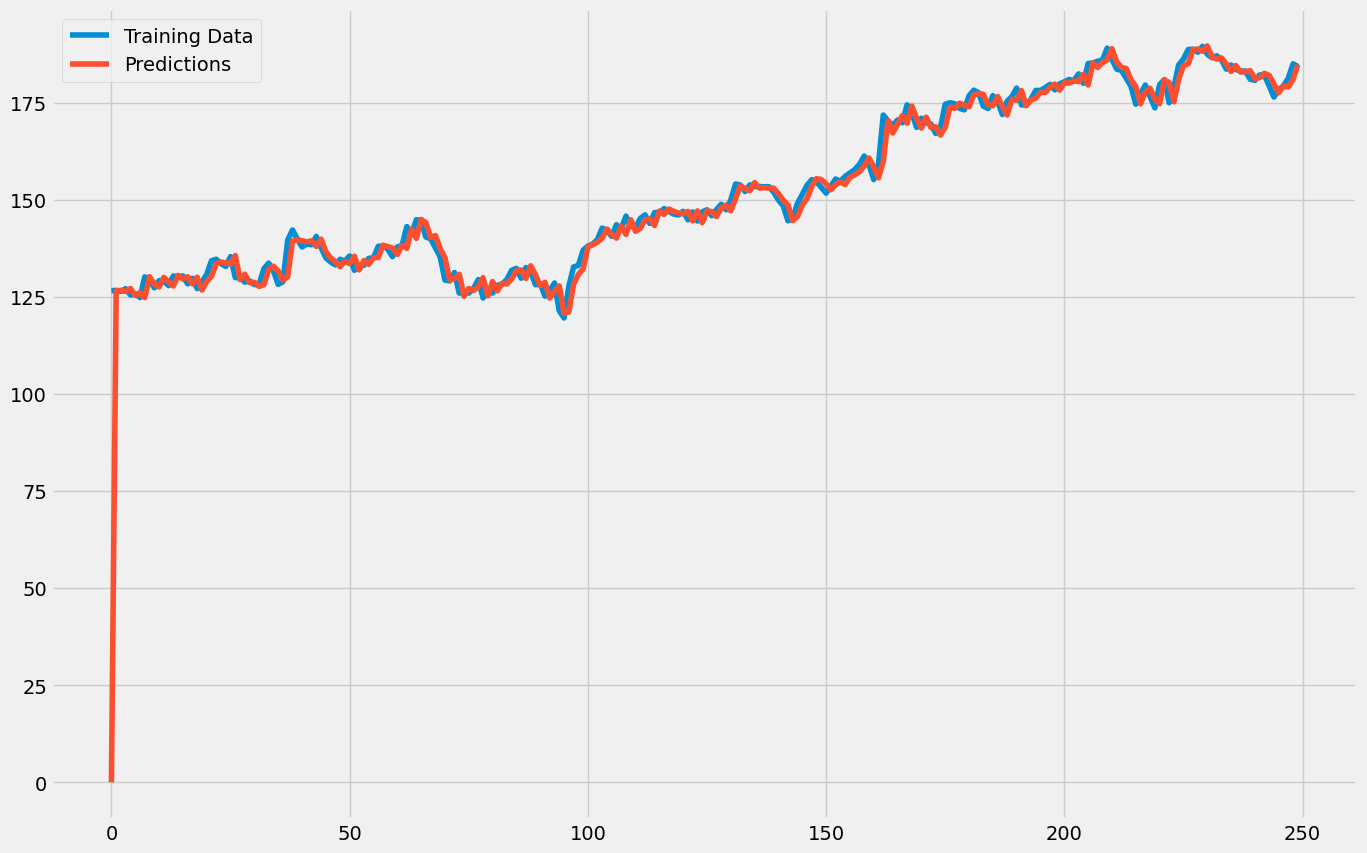

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

### Summary

The ARIMA model appears to provide a good fit for the closing price data, accurately capturing the overall trend and short-term fluctuations. The model’s predictions closely follow the actual data, indicating that the chosen parameters (p=5, d=1, q=2) are effective. However, the initial drop in the data could indicate an issue that might need further investigation or preprocessing. If seasonality is present in the data, extending the model to a SARIMA might improve the fit further.